### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- After completing each Assignment Activity, back up your work to a safe location. This would allow you to revert to a previous state in the case of making a mistake in the code, or deleting a section by mistake. (A simple way of doing this is to save or mail a compressed version at frequent intervals).

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Importing and exploring data

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check the actual_duration.csv dataset as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad.head(5)

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
# Determine whether there are missing values.
print(ad.isnull().sum())

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64


In [4]:
# Determine the metadata of the dataset.
print(ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


In [5]:
# Determine the descriptive statistics of the dataset.
print(ad.describe())

       count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000


In [6]:
# Determine whether there are duplicate values.
print(ad.duplicated().sum())

0


In [7]:
# Determine the number of rows and columns in the ad dataset.
print('Number of rows:', ad.shape[0])
print('Number of columns: ', ad.shape[1])

Number of rows: 137793
Number of columns:  8


In [8]:
# Import and sense-check the appointments_regional.csv dataset as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head(5)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [9]:
# Determine whether there are missing values.
print(ar.isnull().sum())

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64


In [10]:
# Determine the metadata of the dataset.
print(ar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None


In [11]:
# Determine the descriptive statistics of the dataset.
print(ar.describe())

       count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000


In [12]:
# Determine whether there are duplicate values.
print(ar.duplicated().sum())

21604


In [13]:
# Clean the ar dataset from duplicate values.
ar_clean = ar.drop_duplicates()

# Determine the numbers of rows and columns in the new clean ar dataset.
print('Number of rows:', ar_clean.shape[0])
print('Number of columns:', ar_clean.shape[1])

Number of rows: 575217
Number of columns: 7


In [14]:
# Import and sense-check the national_categories.xlsx dataset as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc.head(5)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [15]:
# Determine whether there are missing values.
print(nc.isnull().sum())

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


In [16]:
# Determine the metadata of the dataset.
print(nc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None


In [17]:
# Determine the descriptive statistics of the dataset.
print(nc.describe())

                    appointment_date  count_of_appointments
count                         817394          817394.000000
mean   2022-01-16 00:50:35.860796160             362.183684
min              2021-08-01 00:00:00               1.000000
25%              2021-10-25 00:00:00               7.000000
50%              2022-01-18 00:00:00              25.000000
75%              2022-04-07 00:00:00             128.000000
max              2022-06-30 00:00:00           16590.000000
std                              NaN            1084.576600


In [18]:
# Determine whether there are duplicate values.
print(nc.duplicated().sum())

0


In [19]:
# Determine the number of rows and columns in the ad dataset.
print('Number of rows:', nc.shape[0])
print('Number of columns:', nc.shape[1])

Number of rows: 817394
Number of columns: 8


### Explore the data set

**Question 1:** How many locations are there in the dataset?

In [20]:
# Determine the number of locations.
nc_locations = nc['sub_icb_location_name'].value_counts()
print('Count of locations:', nc_locations.size)

Count of locations: 106


**Question 2:** What are the five locations with the highest number of appointments?



In [21]:
# Determine the top five locations based on record count.
nc_toplocations = nc['sub_icb_location_name'].value_counts()
print('The five locations with the highest number of appointments:', nc_toplocations.head(5))

The five locations with the highest number of appointments: sub_icb_location_name
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: count, dtype: int64


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [22]:
# Determine the number of service settings.
nc_ss = nc['service_setting'].value_counts()
print('Count of service settings:', nc_ss.size)

Count of service settings: 5


In [23]:
# Determine the number of context types.
nc_ct = nc['context_type'].value_counts()
print('Count of context types:', nc_ct.size)

Count of context types: 3


In [24]:
# Determine the number of national categories.
nc_nc = nc['national_category'].value_counts()
print('Count of national categories:', nc_nc.size)

Count of national categories: 18


In [25]:
# Determine the number of appointment statuses.
ar_as = ar['appointment_status'].value_counts()
print('Count of appointment statuses:', ar_as.size)

Count of appointment statuses: 3


# 

# Analysing the data

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [26]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad_f5 = ad['appointment_date'].head(5)
print(ad_f5)

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object


In [27]:
# View the first five rows of appointment_month for the ar DataFrame to determine the date format.
ar_clean_f5 = ar['appointment_month'].head(5)
print(ar_clean_f5)

0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object


In [28]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc_f5 = nc['appointment_date'].head(5)
print(nc_f5)

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]


In [29]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [30]:
# Change the date format of ar_clean['appointment_date'].
ar_clean['appointment_date'] = pd.to_datetime(ar['appointment_month'])

# View the DateFrame.
ar_clean.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,appointment_date
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107,2020-01-01
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,2020-01-01
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,2020-01-01
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,2020-01-01
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,2020-01-01


In [31]:
# Change the date format of nc['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [32]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
ad['appointment_date'].agg(['min', 'max'])
print(min(ad['appointment_date']), ': the minumum date')
print(max(ad['appointment_date']), ': the maximum date')

2021-12-01 00:00:00 : the minumum date
2022-06-30 00:00:00 : the maximum date


In [33]:
# Determine the minimum and maximum months in the ar_clean DataFrame.
# Use appropriate docstrings.
ar_clean['appointment_month'].agg(['min', 'max'])
print(min(ar_clean['appointment_month']), ': the minimum month')
print(max(ar_clean['appointment_month']), ': the maximum month')

2020-01 : the minimum month
2022-06 : the maximum month


In [34]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
nc['appointment_date'].agg(['min', 'max'])
print(min(nc['appointment_date']), ': the minumum date')
print(max(nc['appointment_date']), ': the maximum date')

2021-08-01 00:00:00 : the minumum date
2022-06-30 00:00:00 : the maximum date


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [35]:
# For each of these service settings, determine the number of records available for the period and the location. 
nc_subset = nc[nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z']
nc_subset_daterange = nc_subset[(nc_subset['appointment_date'] >= '2022-01-01') & 
                                (nc_subset['appointment_date'] <= '2022-06-01')]

# View the output.
nc_subset_daterange['service_setting'].value_counts()

service_setting
General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: count, dtype: int64

**Question 3:** Which month had the highest number of appointments?

In [36]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
months_appointments_sum = nc.groupby('appointment_month')['count_of_appointments'].sum()
months_appointments_sum_sort = months_appointments_sum.sort_values(ascending=False)
print(months_appointments_sum_sort, "Number of appointments per month")

appointment_month
2021-11    30405070
2021-10    30303834
2022-03    29595038
2021-09    28522501
2022-05    27495508
2022-06    25828078
2022-01    25635474
2022-02    25355260
2021-12    25140776
2022-04    23913060
2021-08    23852171
Name: count_of_appointments, dtype: int64 Number of appointments per month


**Question 4:** What was the total number of records per month?

In [37]:
# Total number of records per month.
# Use the groupby() and sort_values() functions.
months_appointments_count = nc.groupby('appointment_month')['count_of_appointments'].count()
months_appointments_count_sort = months_appointments_count.sort_values(ascending=False)
print(months_appointments_count_sort, "Total number of records per month")

appointment_month
2022-03    82822
2021-11    77652
2022-05    77425
2021-09    74922
2022-06    74168
2021-10    74078
2021-12    72651
2022-01    71896
2022-02    71769
2022-04    70012
2021-08    69999
Name: count_of_appointments, dtype: int64 Total number of records per month


# 

# Visualising and identifying initial trends

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [38]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [39]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [40]:
# Aggregate on monthly level and determine the sum of records per month.
nc_rpm = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
print(nc_rpm)

   appointment_month            service_setting  count_of_appointments
0            2021-08  Extended Access Provision                 160927
1            2021-08           General Practice               21575852
2            2021-08                      Other                 449101
3            2021-08       Primary Care Network                 432448
4            2021-08                   Unmapped                1233843
5            2021-09  Extended Access Provision                 187906
6            2021-09           General Practice               25940821
7            2021-09                      Other                 527174
8            2021-09       Primary Care Network                 530485
9            2021-09                   Unmapped                1336115
10           2021-10  Extended Access Provision                 209539
11           2021-10           General Practice               27606171
12           2021-10                      Other                 556487
13    

**Service settings:**

Text(0, 0.5, 'No. of Appointments (Ten Millions)')

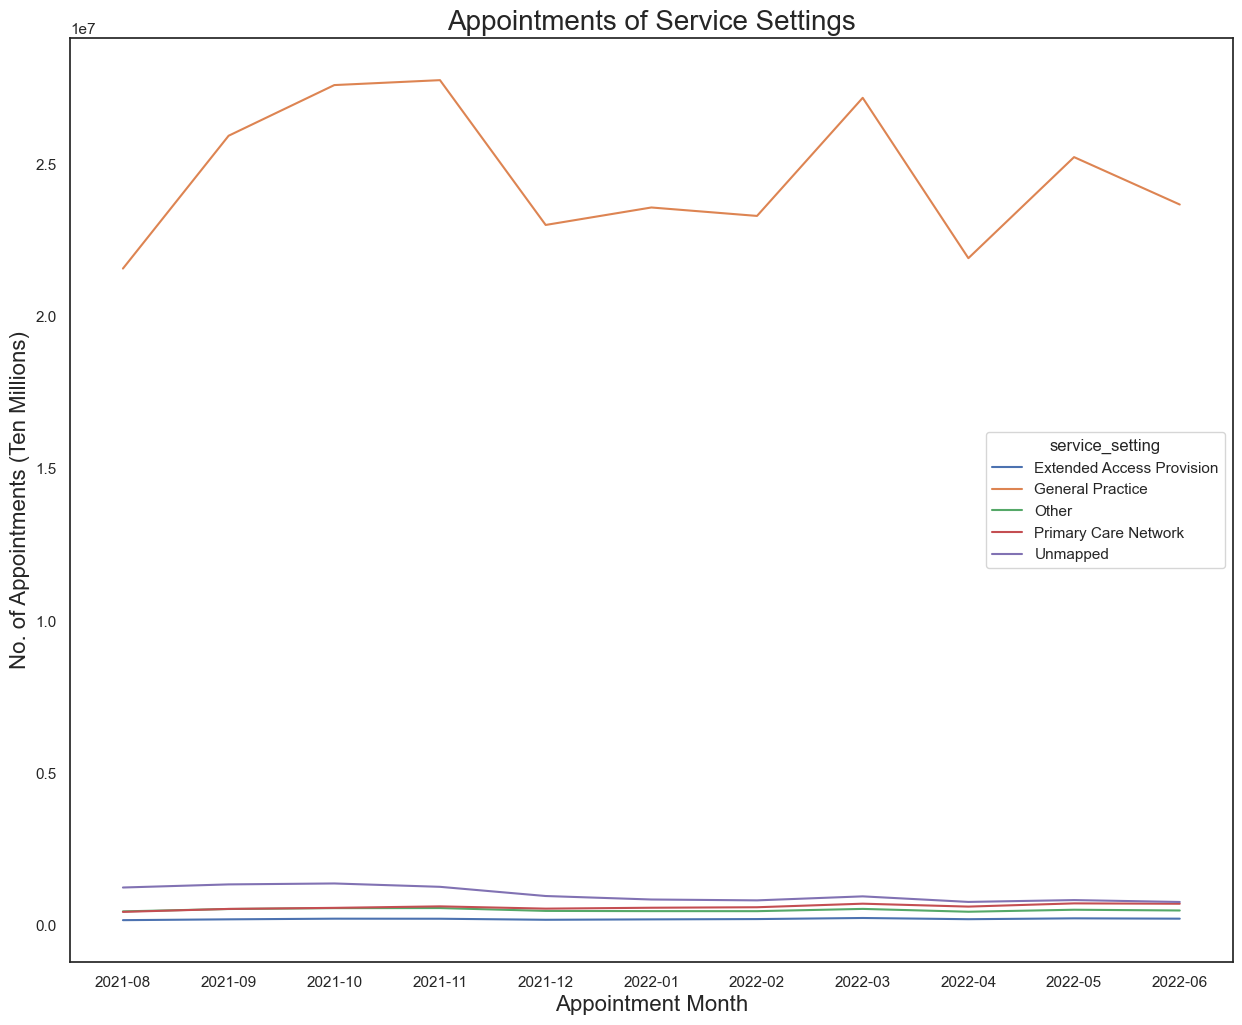

In [41]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(x="appointment_month", y="count_of_appointments", hue='service_setting', data=nc_rpm, ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Appointments of Service Settings', fontsize=20)
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('No. of Appointments (Ten Millions)', fontsize=16)

**Context types:**

In [42]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ct.head()

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


Text(0, 0.5, 'No. of Appointments (Ten Millions)')

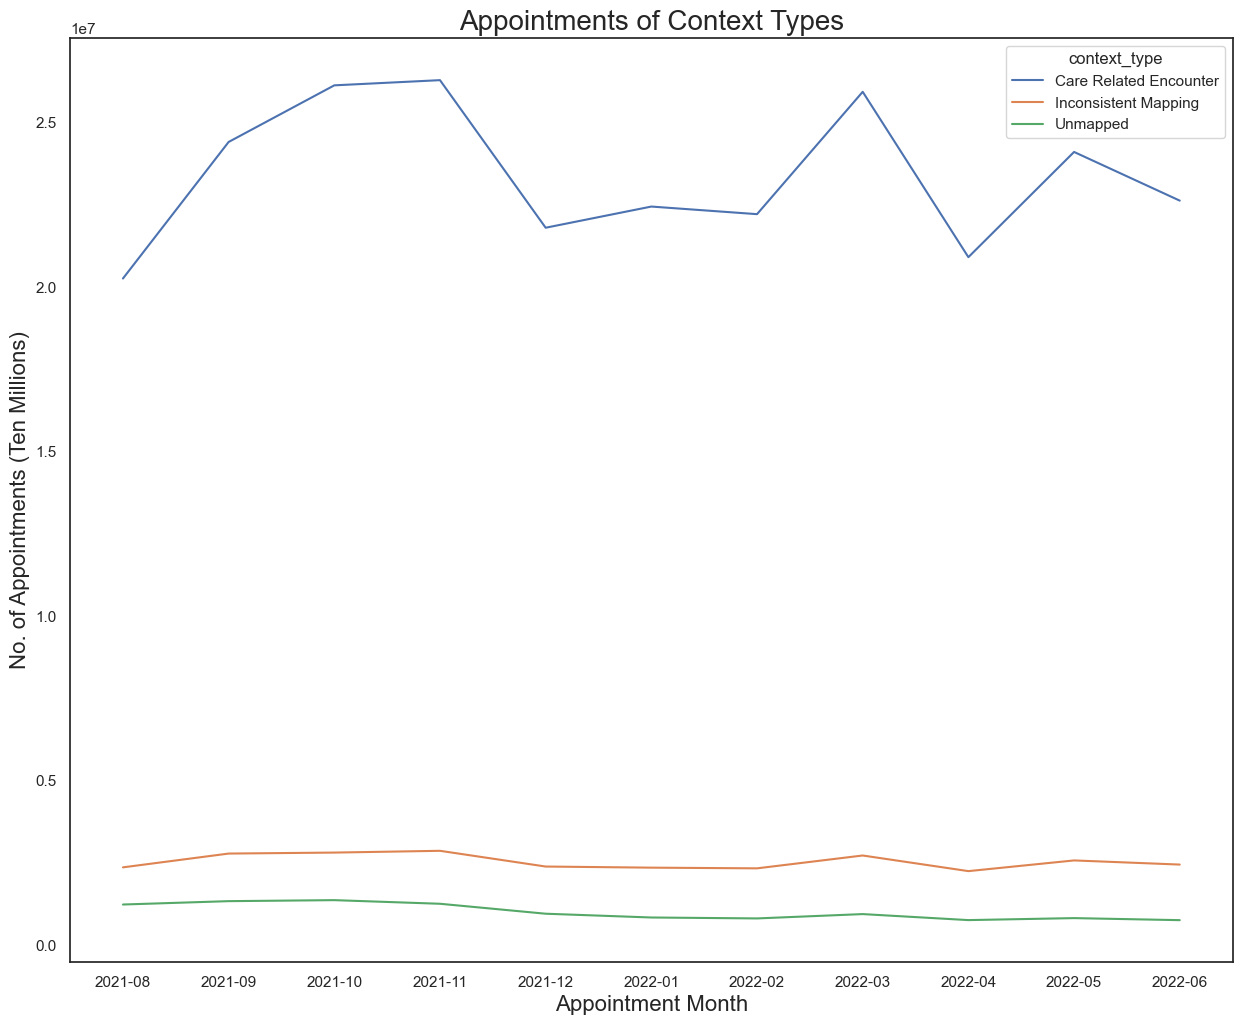

In [43]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x="appointment_month", y="count_of_appointments", hue='context_type', data=nc_ct, ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Appointments of Context Types', fontsize=20)
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('No. of Appointments (Ten Millions)', fontsize=16)

**National categories:**

In [44]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# View output.
nc_nc.head()

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


Text(0, 0.5, 'No. of Appointments (Ten Millions)')

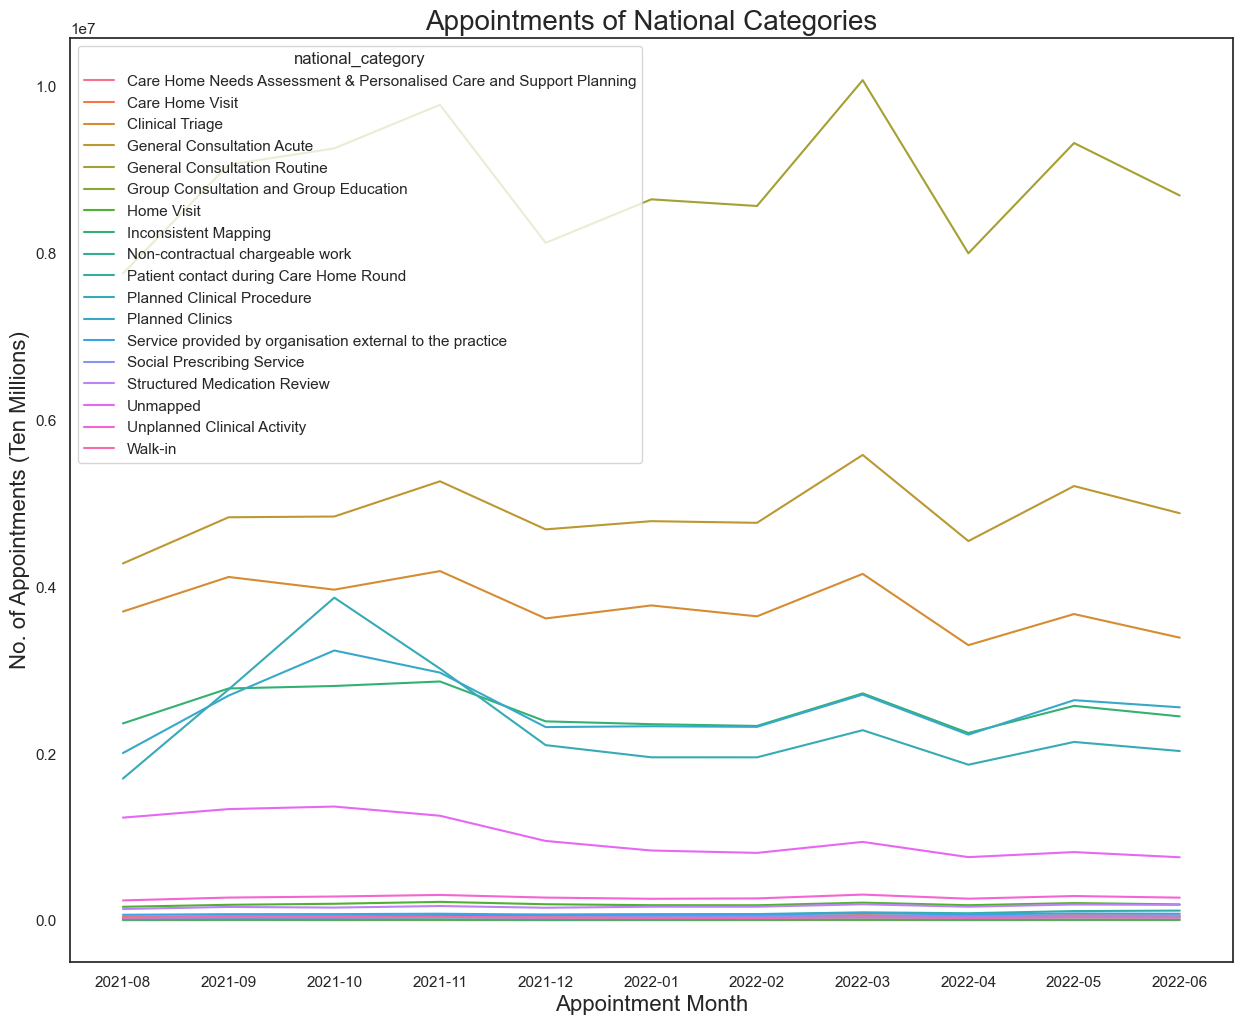

In [45]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.lineplot(x="appointment_month", y="count_of_appointments", hue='national_category', data=nc_nc, ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Appointments of National Categories', fontsize=20)
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('No. of Appointments (Ten Millions)', fontsize=16)

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are Summer (August 2021), Autumn (October 2021), Winter (January 2022), and Spring (April 2022).

**Summer (August 2021):**

In [46]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc.groupby(['appointment_date', 'appointment_month', 
                        'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ss_day.head()

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054


Text(0, 0.5, 'No. of Appointments (Millions)')

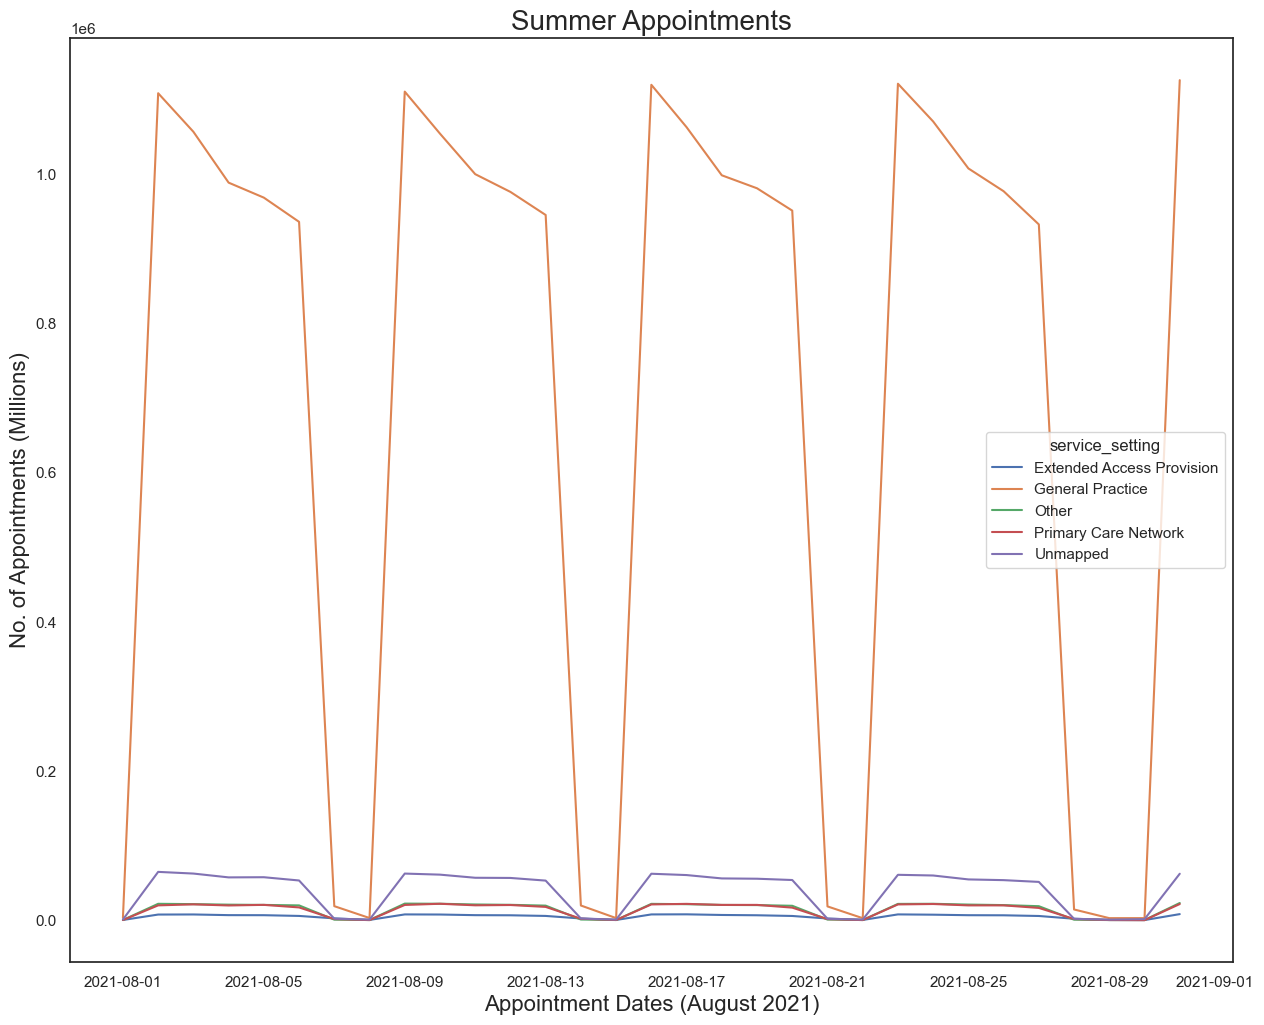

In [47]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
nc_ss_day_summer = nc_ss_day[(nc_ss_day["appointment_date"] >= '2021-08-01') & 
                             (nc_ss_day["appointment_date"] <= '2021-08-31')]
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_day_summer, 
             ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Summer Appointments', fontsize=20)
plt.xlabel('Appointment Dates (August 2021)', fontsize=16)
plt.ylabel('No. of Appointments (Millions)', fontsize=16)

**Autumn (October 2021):**

Text(0, 0.5, 'No. of Appointments (Millions)')

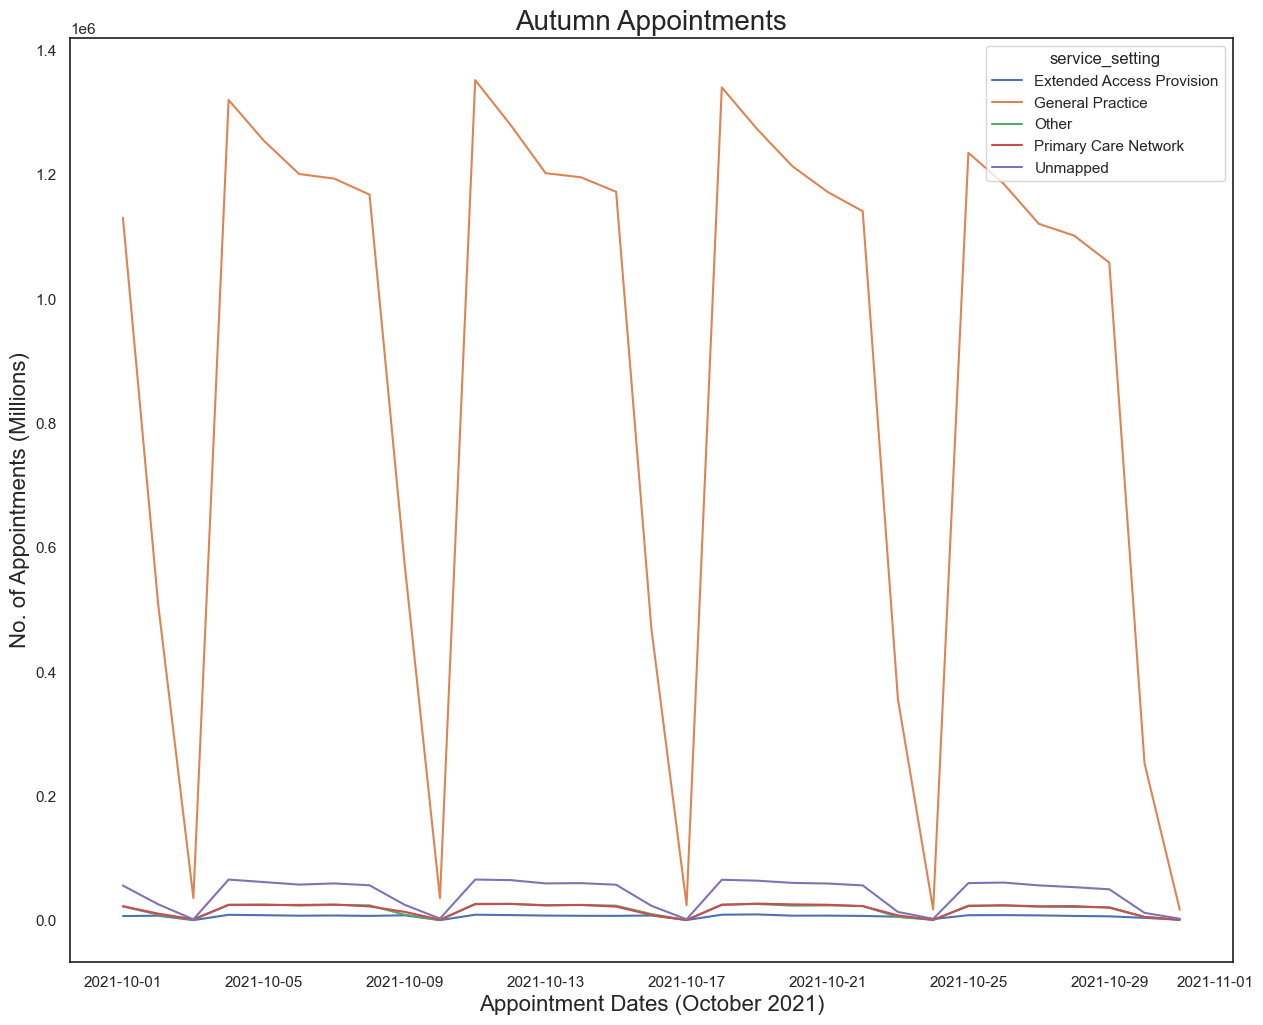

In [48]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
nc_ss_day_autumn = nc_ss_day[(nc_ss_day["appointment_date"] >= '2021-10-01') & 
                             (nc_ss_day["appointment_date"] <= '2021-10-31')]
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_day_autumn, 
             ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Autumn Appointments', fontsize=20)
plt.xlabel('Appointment Dates (October 2021)', fontsize=16)
plt.ylabel('No. of Appointments (Millions)', fontsize=16)

**Winter (January 2022):**

Text(0, 0.5, 'No. of Appointments (Millions)')

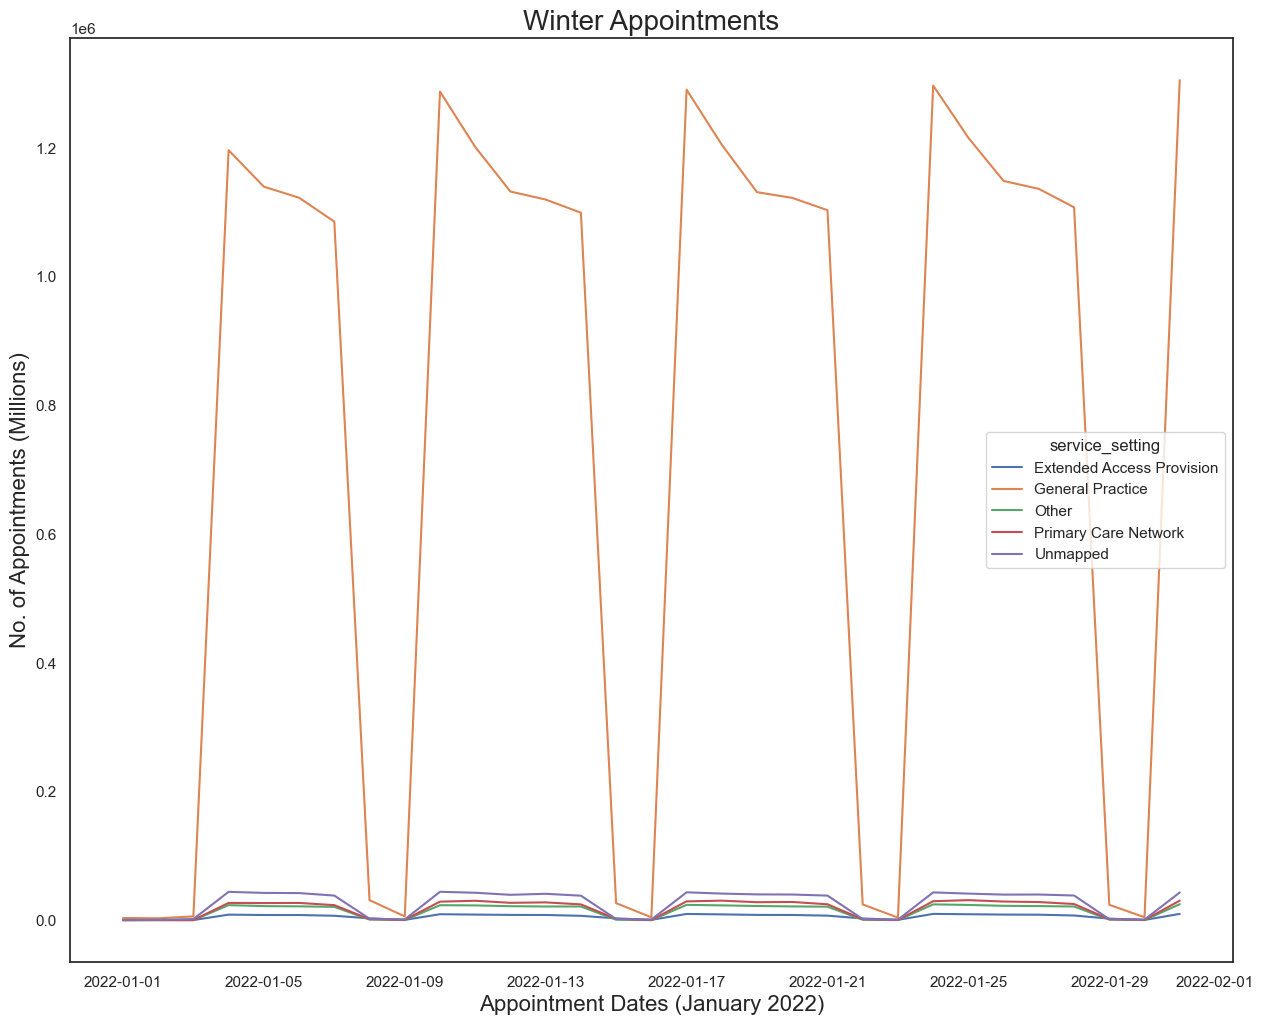

In [49]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
nc_ss_day_winter = nc_ss_day[(nc_ss_day["appointment_date"] >= '2022-01-01') & 
                             (nc_ss_day["appointment_date"] <= '2022-01-31')]
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_day_winter, 
             ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Winter Appointments', fontsize=20)
plt.xlabel('Appointment Dates (January 2022)', fontsize=16)
plt.ylabel('No. of Appointments (Millions)', fontsize=16)

**Spring (April 2022):**

Text(0, 0.5, 'No. of Appointments (Millions)')

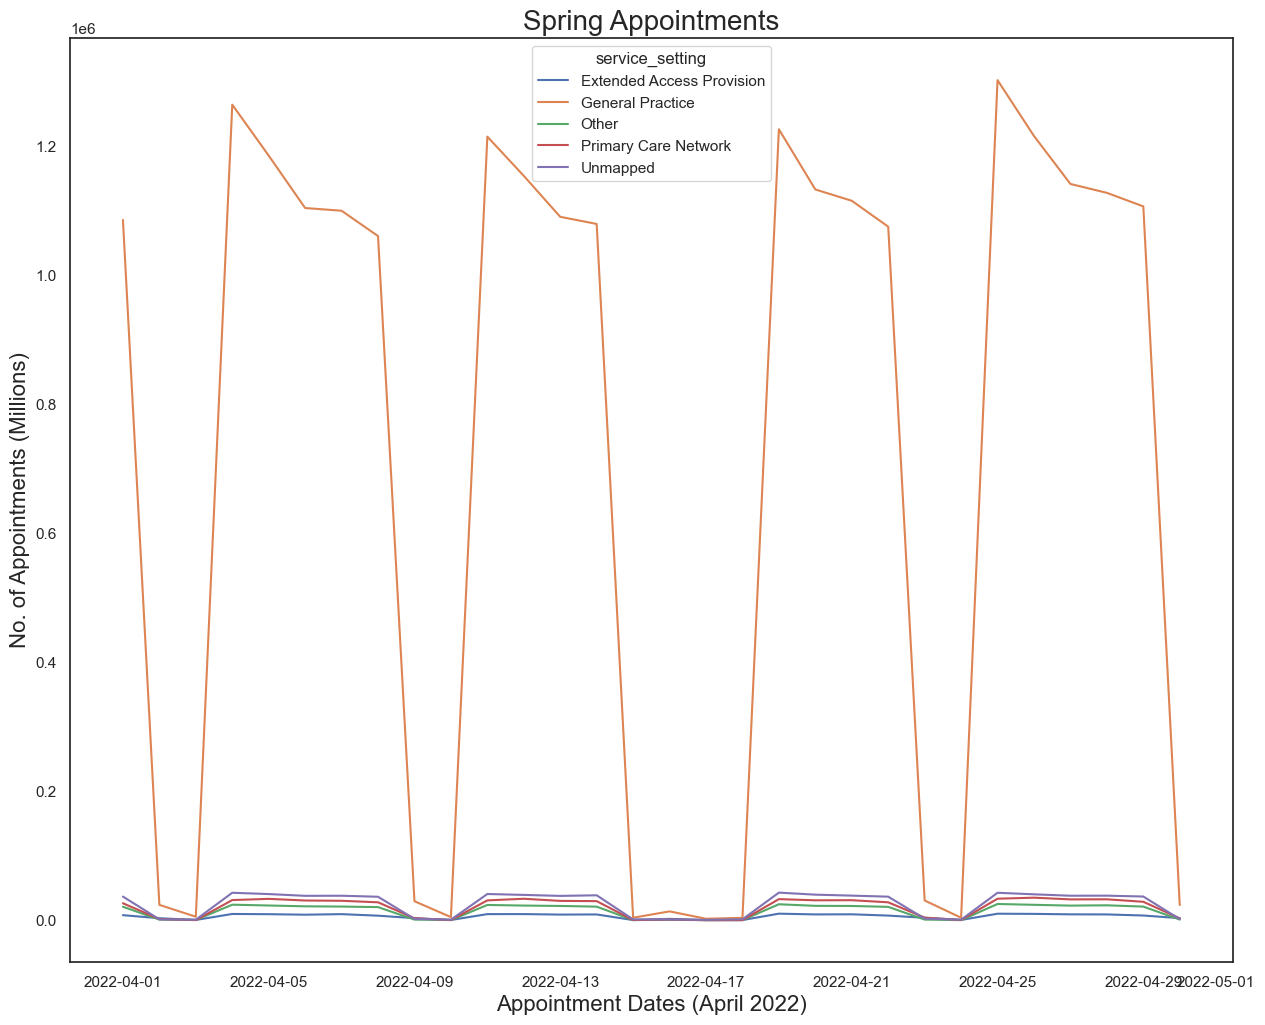

In [50]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
nc_ss_day_spring = nc_ss_day[(nc_ss_day["appointment_date"] >= '2022-04-01') & 
                             (nc_ss_day["appointment_date"] <= '2022-04-30')]
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_day_spring, 
             ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Spring Appointments', fontsize=20)
plt.xlabel('Appointment Dates (April 2022)', fontsize=16)
plt.ylabel('No. of Appointments (Millions)', fontsize=16)

# 

# Analysing NHS-related Twitter data

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [51]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [52]:
# Load the dataset.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head(5)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [53]:
# Explore the metadata.
tweets.describe()
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [54]:
# Explore the dataset.
print('Number of rows:', tweets.shape[0])
print('Number of columns:', tweets.shape[1])

Number of rows: 1174
Number of columns: 10


In [55]:
# Determine number of duplicate values in the dataset.
print(tweets.duplicated().sum())

0


In [56]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.
retweets = tweets[['tweet_retweet_count']].value_counts()
print(retweets)
favorites = tweets[['tweet_favorite_count']].value_counts()
print(favorites)

# I do believe it would be useful to only look at the retweeted and favourite tweet messages so the NHS will know
# the kind of messages that speaks to their community and build even more trust between the patients and the NHS.

tweet_retweet_count
0                      526
1                      215
2                      114
3                       70
5                       35
4                       27
7                       18
12                      16
8                       15
73                      14
9                       13
6                       12
208                     12
35                      10
37                       6
11                       6
53                       5
10                       5
63                       4
44                       4
150                      4
85                       3
41                       3
76                       3
62                       3
207                      3
68                       3
24                       2
23                       2
72                       2
78                       2
16                       2
107                      1
79                       1
169                      1
39                       1
57      

In [57]:
# Create a new DataFrame containing only the text.
tweets_text = tweets['tweet_full_text']

# View the DataFrame.
print(tweets_text)

0       As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                                   RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                                RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                                  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4       ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a gr

In [58]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [59]:
# Create a new series to count the values in the list.
tags_series = pd.Series(tags)
tags_series_values = tags_series.value_counts()

# Display the first 30 records.
tags_first30 = tags_series_values.iloc[0:30]
print(tags_first30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [60]:
# Convert the series to a DataFrame in preparation for visualisation.
tags_data = pd.DataFrame(tags_series_values).reset_index()

# Rename the columns.
tags_data.rename(columns={tags_data.columns[0]: "word", tags_data.columns[1]: "count"}, inplace=True)
print(tags_data)

               word  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]


In [61]:
# Fix the count datatype.
tags_data.dtypes
tags_data['count'].astype(int)

# View the result.
print(tags_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB
None


In [62]:
# Display records where the count is larger than 10.
tags_data_over10 = tags_data[(tags_data['count'] > 10)]
print(tags_data_over10)

                           word  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                       #pharma     25
10                   #marketing     25
11                  #medtwitter     24
12                     #biotech     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
20                 #coronavirus     16
21             #womeninmedicine     16
22                       #covid     16
23        #competitivemarketing     16
24                    #we

[Text(0.5, 1.0, 'Popularity of Hashtags')]

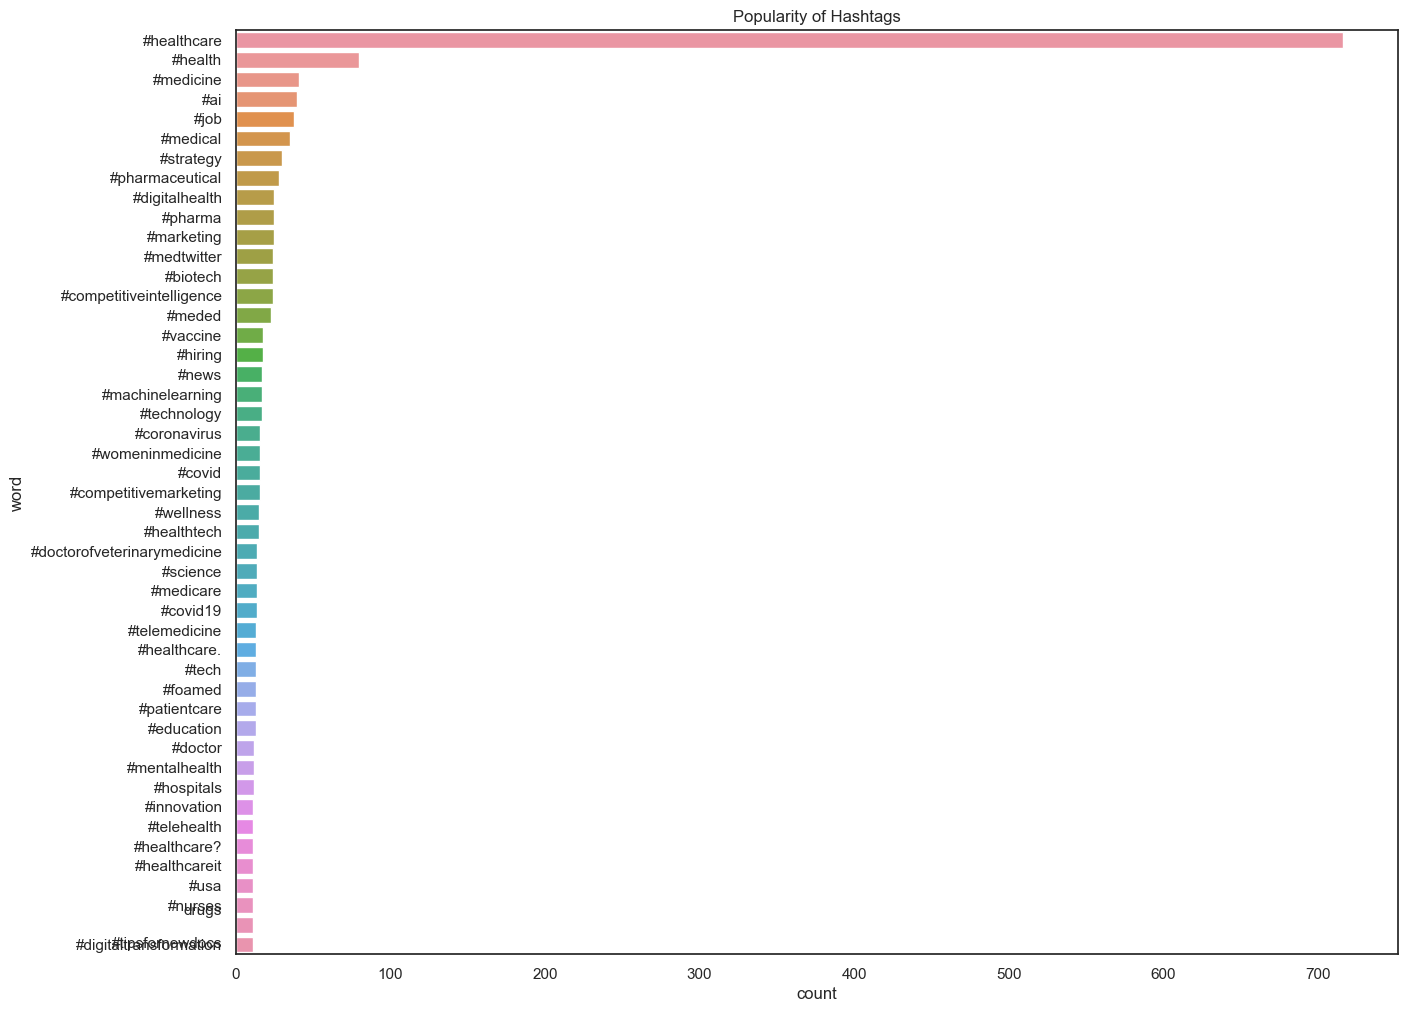

In [63]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns.barplot(x="count", y="word", data=tags_data_over10).set(title="Popularity of Hashtags")

[Text(0.5, 1.0, 'Popularity of Hashtags without Healthcare')]

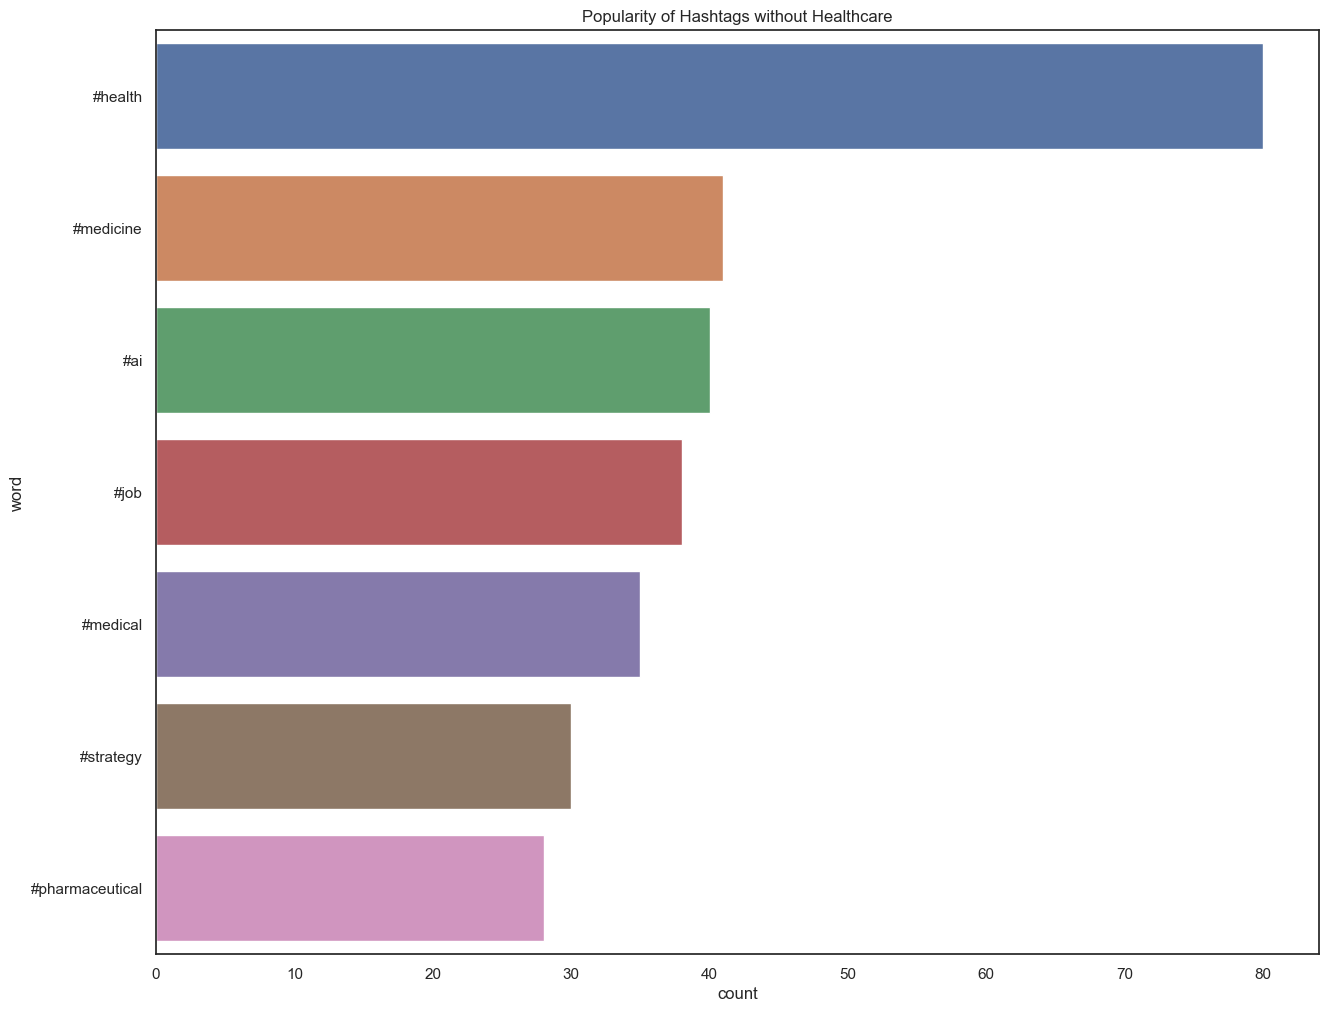

In [64]:
# Create the plot.
tags_data_exhc = tags_data[(tags_data['count'] > 25) & (tags_data['count'] < 100)]

# View the barplot.
sns.barplot(x="count", y="word", data=tags_data_exhc).set(title="Popularity of Hashtags without Healthcare")

# 

# Making recommendations

### Make recommendations to the NHS. 

In [65]:
# Prepare your workstation.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# Make sure the data is clean
print('Number of missing values:', ar.isnull().sum())
print('Number of duplicate values:', ar.duplicated().sum())

Number of missing values: icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64
Number of duplicate values: 21604


In [66]:
# Get rid of the duplicate values
ar_clean2 = ar.drop_duplicates()
print('Number of missing values:', ar_clean2.isnull().sum())
print('Number of duplicate values:', ar_clean2.duplicated().sum())

# View the new clean DataFrame.
ar_clean2

Number of missing values: icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64
Number of duplicate values: 0


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596813,E54000050,2022-06,Unknown,Unknown,Telephone,Same Day,10
596815,E54000050,2022-06,Unknown,Unknown,Unknown,15 to 21 Days,13
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28


In [67]:
# Print the min and max dates.
print('The first month is:', ar_clean2.appointment_month.min())
print('The final month is:', ar_clean2.appointment_month.max())

The first month is: 2020-01
The final month is: 2022-06


In [68]:
# Filter the dataset to only look at data from 2021-08 onwards.
ar_clean2_filtered = ar_clean2[ar_clean2['appointment_month'] >= '2021-08']

# View the data
ar_clean2_filtered

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596813,E54000050,2022-06,Unknown,Unknown,Telephone,Same Day,10
596815,E54000050,2022-06,Unknown,Unknown,Unknown,15 to 21 Days,13
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [69]:
# Create an aggregated dataset to review the different features.
ar_agg = ar_clean2_filtered.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode',
                                   'time_between_book_and_appointment']
                                   )['count_of_appointments'].sum().reset_index()

# View the DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5493
3750,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5075
3751,2022-06,Unknown,Unknown,Unknown,Same Day,1889
3752,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,51


In [70]:
# Determine the total number of appointments per month.
ar_df = ar_agg.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# NHS have a max capacity of 1,200,000 appointmenters per day so 1200000*30 = the monthly cap.
# 30 is the average amount of days per month
ar_df['nhs_monthly_cap'] = 36000000

# Add a new column to indicate the average utilisation of services.
# Work out the percentage of the capacity (1200000 appointments per day so 36000000 per month).
ar_df['average_utilisation'] = (ar_df['count_of_appointments'] / 30).round(1)
ar_df['percent'] = ((ar_df['count_of_appointments'] / ar_df['nhs_monthly_cap']) * 100).round(1)

# View the DataFrame.
ar_df

,appointment_month,count_of_appointments,nhs_monthly_cap,average_utilisation,percent
0,2021-08,23843177,36000000,794772.6,66.2
1,2021-09,28514685,36000000,950489.5,79.2
2,2021-10,30296850,36000000,1009895.0,84.2
3,2021-11,30395923,36000000,1013197.4,84.4
4,2021-12,25132174,36000000,837739.1,69.8
5,2022-01,25623928,36000000,854130.9,71.2
6,2022-02,25344812,36000000,844827.1,70.4
7,2022-03,29586020,36000000,986200.7,82.2
8,2022-04,23904960,36000000,796832.0,66.4
9,2022-05,27478652,36000000,915955.1,76.3


Text(0, 0.5, 'Percentage (%)')

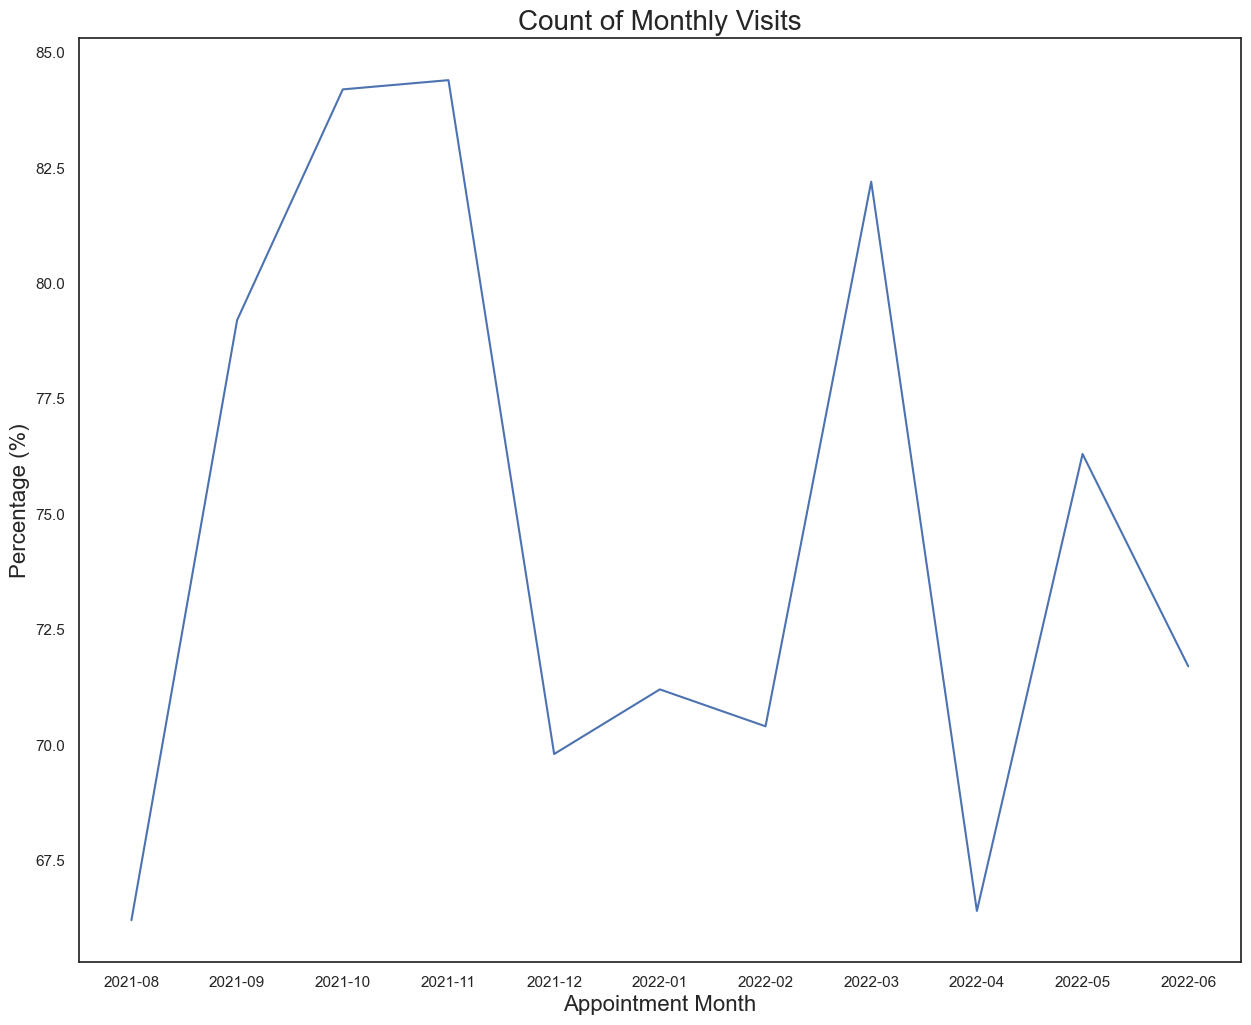

In [71]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot.
sns.lineplot(x='appointment_month', y='percent', data=ar_df, ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Count of Monthly Visits', fontsize=20)
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)

Text(0, 0.5, 'Percentage (%)')

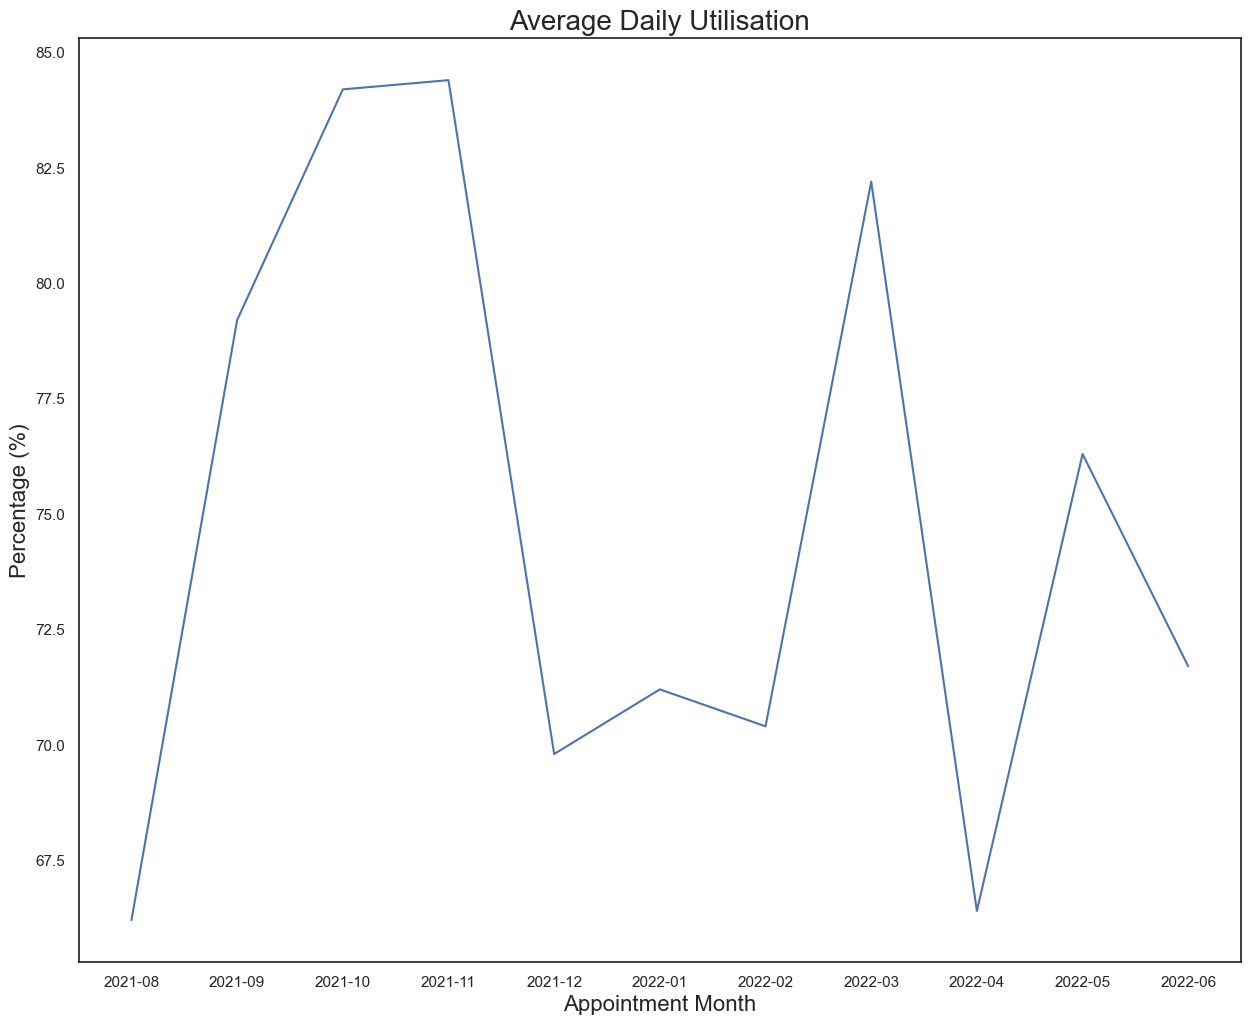

In [72]:
# Plot daily capacity utilisation.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum number of appointments per day is 1,200,000. 
ar_df['nhs_daily_cap'] = 1200000
ar_df['percent2'] = ((ar_df['average_utilisation'] / ar_df['nhs_daily_cap']) * 100).round(1)

# Create a lineplot.
sns.lineplot(x='appointment_month', y='percent2', data=ar_df, ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Average Daily Utilisation', fontsize=20)
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)

**Question 2:** How do the healthcare professional types differ over time?

Text(0, 0.5, 'No. of Appointments (Ten Millions)')

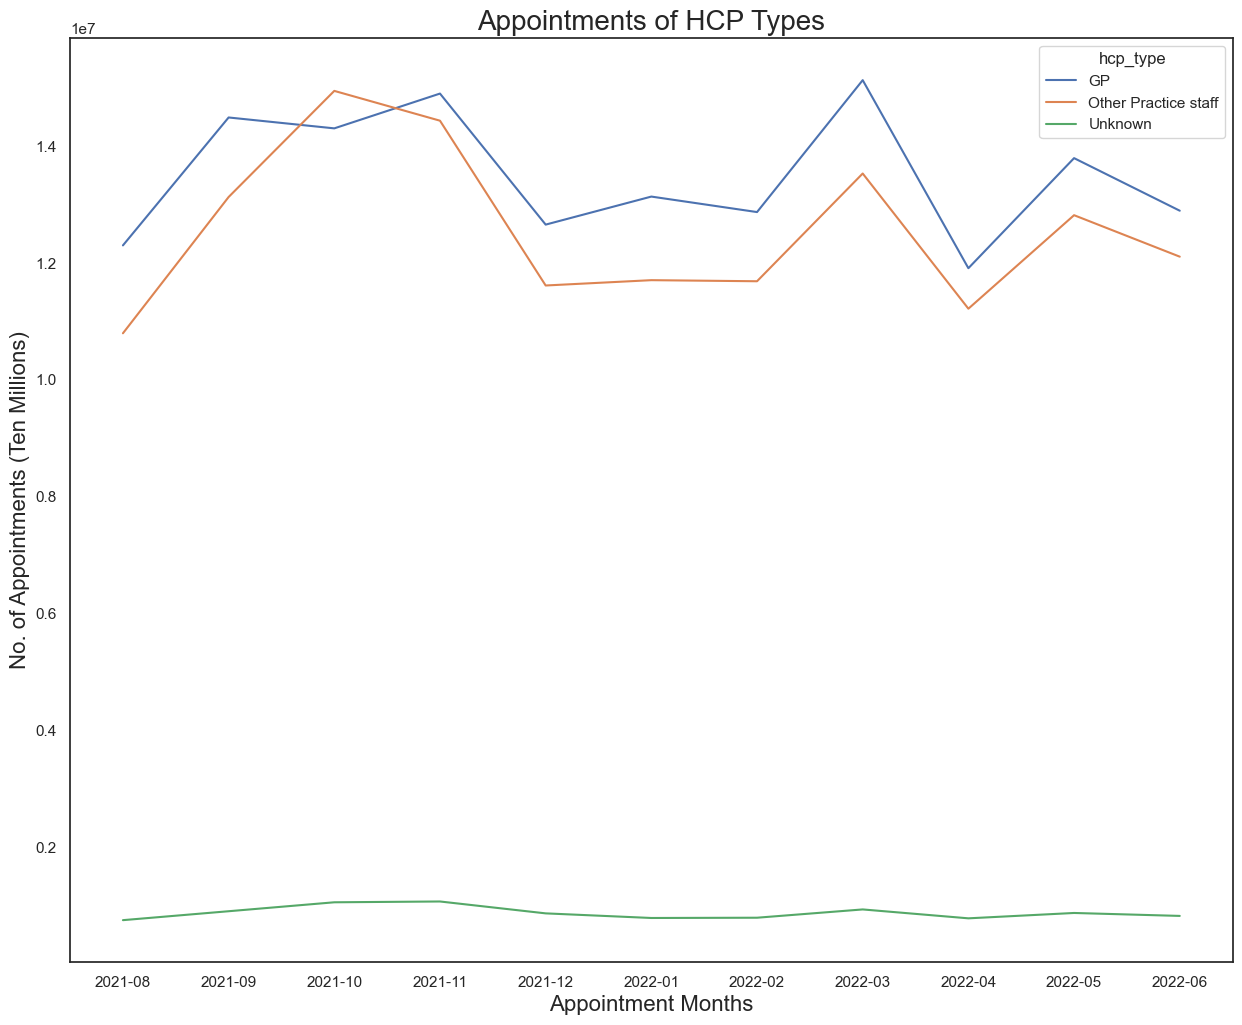

In [74]:
# Create a separate data set that can be used in future weeks. 
ar_hcp = ar_clean2_filtered.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to answer the question.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_hcp, ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Appointments of HCP Types', fontsize=20)
plt.xlabel('Appointment Months', fontsize=16)
plt.ylabel('No. of Appointments (Ten Millions)', fontsize=16)

**Question 3:** Are there significant changes in whether or not visits are attended?

Text(0, 0.5, 'No. of Appointments (Ten Millions)')

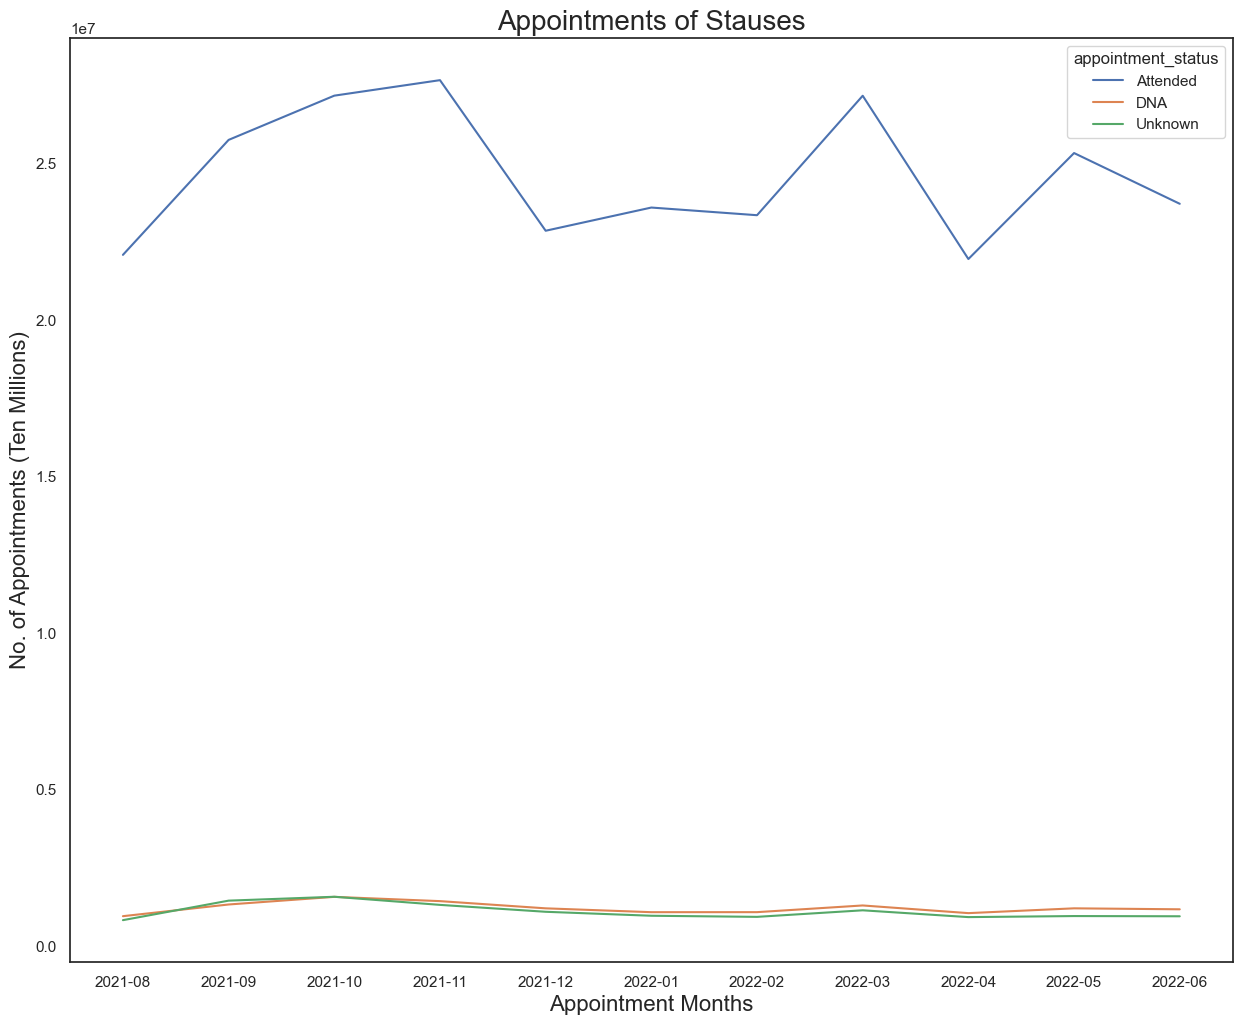

In [75]:
# Create a separate data set that can be used in future weeks. 
ar_attendance = ar_clean2_filtered.groupby(['appointment_month', 
                                   'appointment_status'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to answer the question.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=ar_attendance, 
             ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Appointments of Stauses', fontsize=20)
plt.xlabel('Appointment Months', fontsize=16)
plt.ylabel('No. of Appointments (Ten Millions)', fontsize=16)

**Question 4:** Are there changes in terms of appointment type and the busiest months?

Text(0, 0.5, 'No. of Appointments (Ten Millions)')

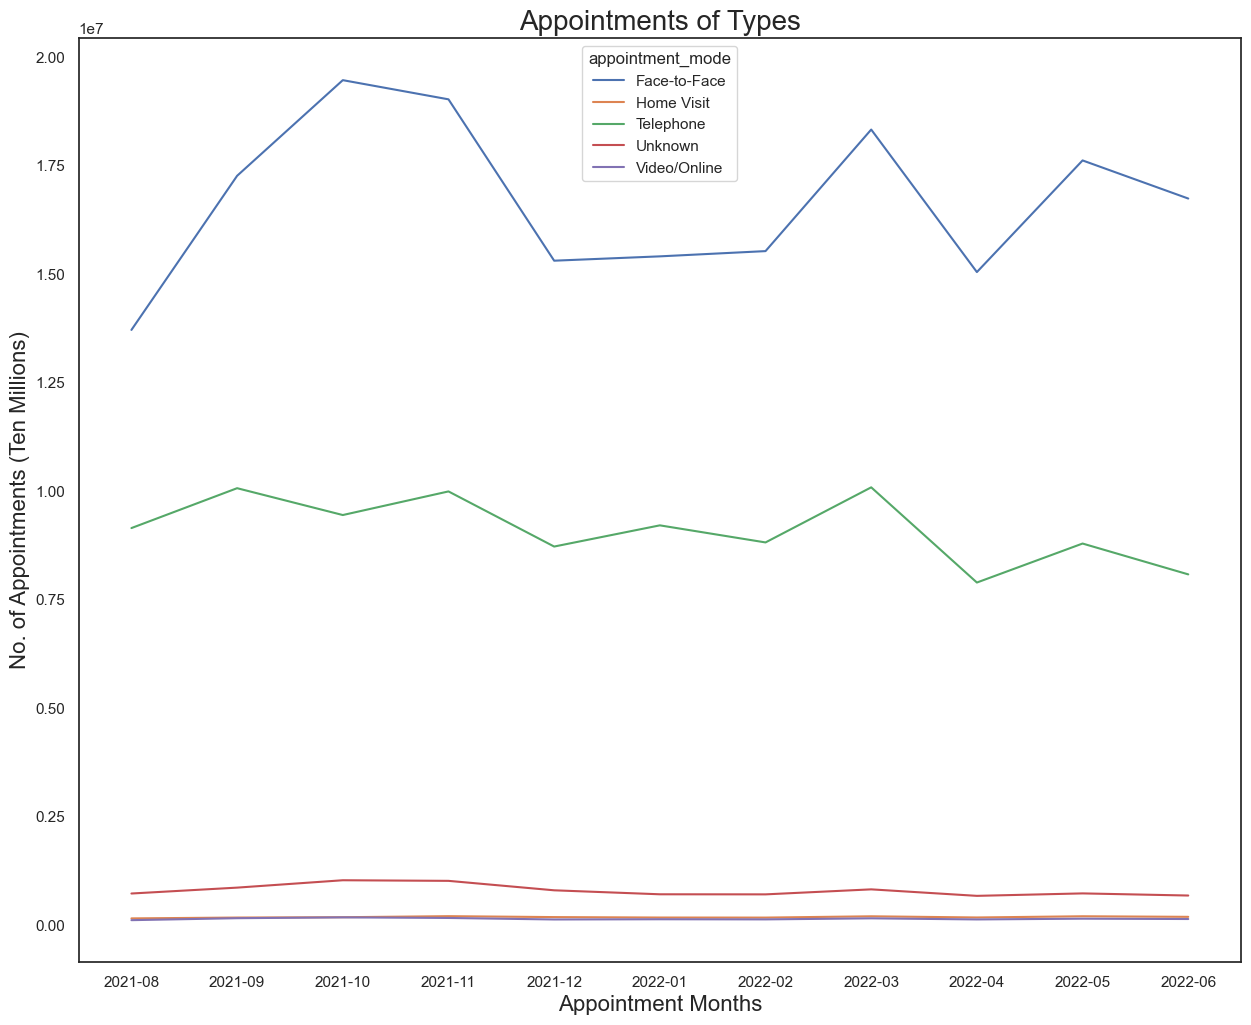

In [76]:
# Create a separate data set that can be used in future weeks. 
ar_type = ar_clean2_filtered.groupby(['appointment_month', 
                                      'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to answer the question.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=ar_type, ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Appointments of Types', fontsize=20)
plt.xlabel('Appointment Months', fontsize=16)
plt.ylabel('No. of Appointments (Ten Millions)', fontsize=16)

**Question 5:** Are there any trends in time between booking and appointment?

Text(0, 0.5, 'No. of Appointments (Ten Millions)')

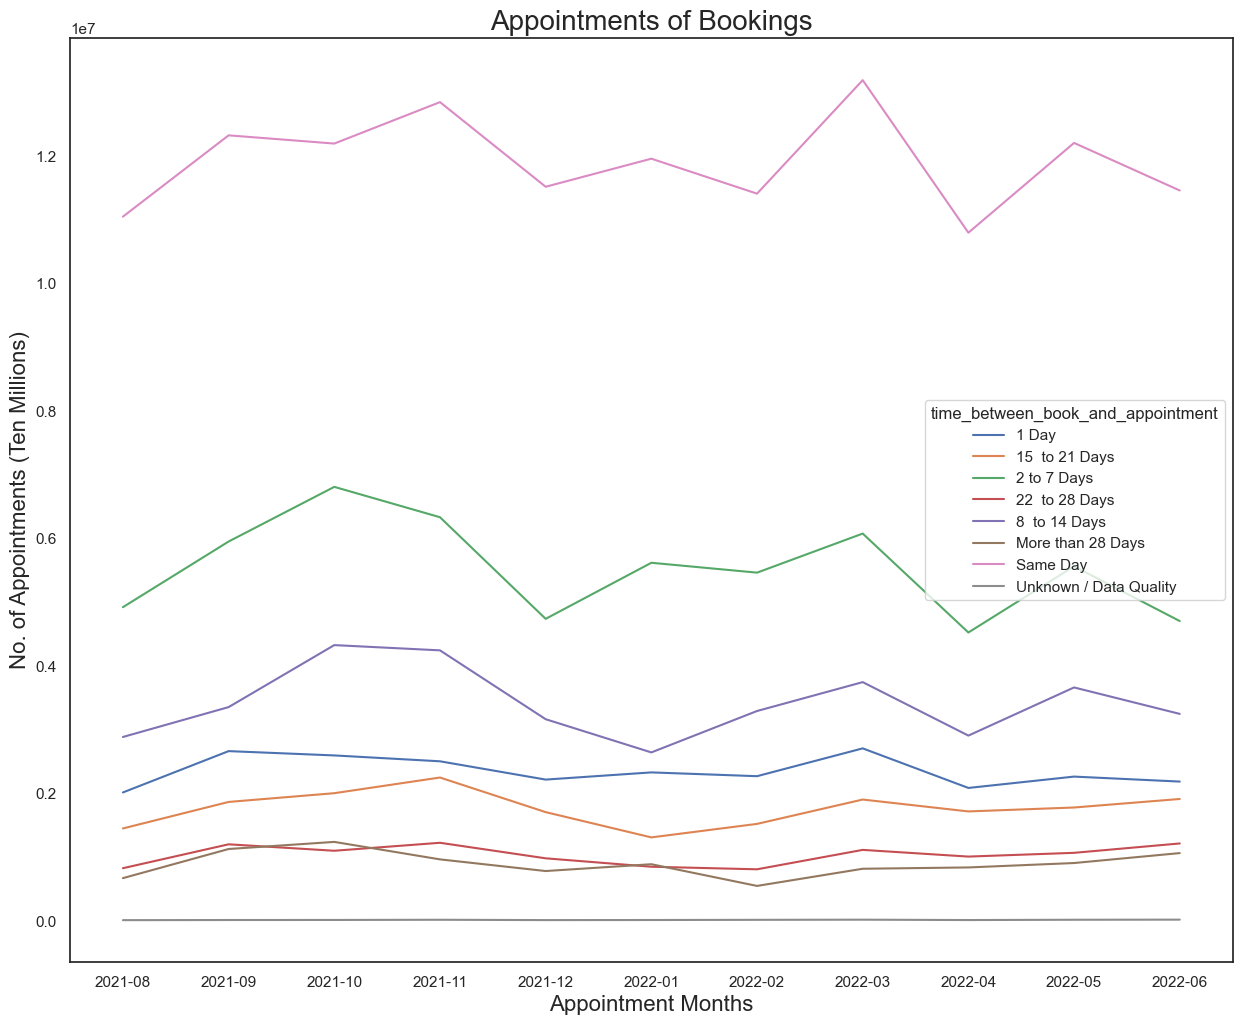

In [77]:
# Create a separate data set that can be used in future weeks. 
ar_trends = ar_clean2_filtered.groupby(['appointment_month', 
                                        'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# Create a lineplot to answer the question.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', 
             data=ar_trends, ci=None)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Appointments of Bookings', fontsize=20)
plt.xlabel('Appointment Months', fontsize=16)
plt.ylabel('No. of Appointments (Ten Millions)', fontsize=16)

**Question 6:** How do the various service settings compare?

In [78]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [79]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_appointment_month_count = nc.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# View the DataFrame.
nc_appointment_month_count

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


Text(0, 0.5, 'Count of Appointments (Ten Millions)')

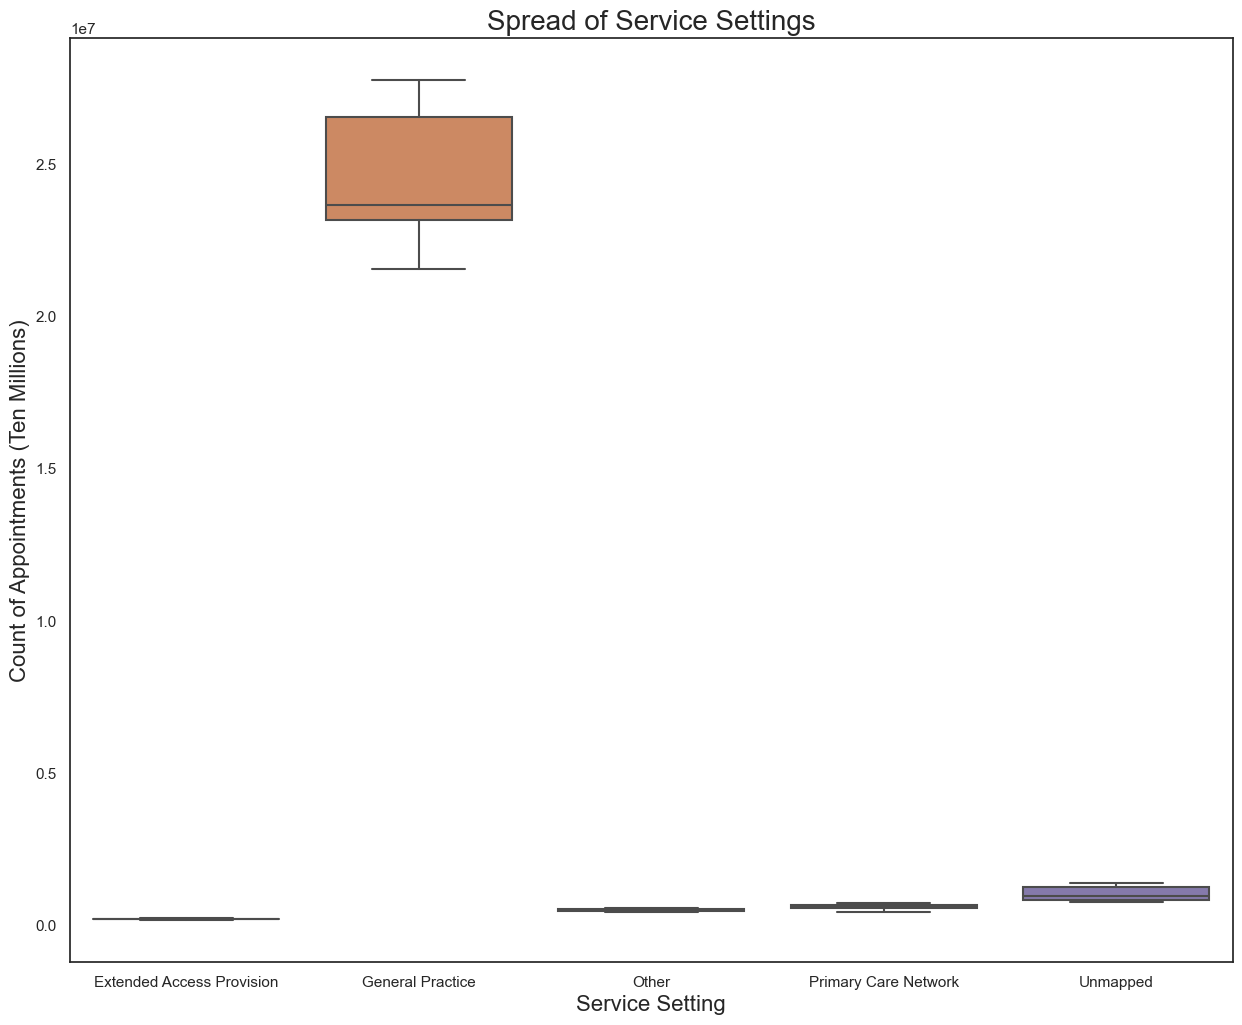

In [80]:
# (Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of 
# appointments.)
nc_ss_count = nc.groupby(['appointment_month','service_setting'])['count_of_appointments'].sum().reset_index()

# (Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of 
# appointments.)
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_ss_count)

# Assigning legends to the title, x-axis and y-axis.
plt.title('Spread of Service Settings', fontsize=20)
plt.xlabel('Service Setting', fontsize=16)
plt.ylabel('Count of Appointments (Ten Millions)', fontsize=16)

Text(0, 0.5, 'Count of Appointments (Millions)')

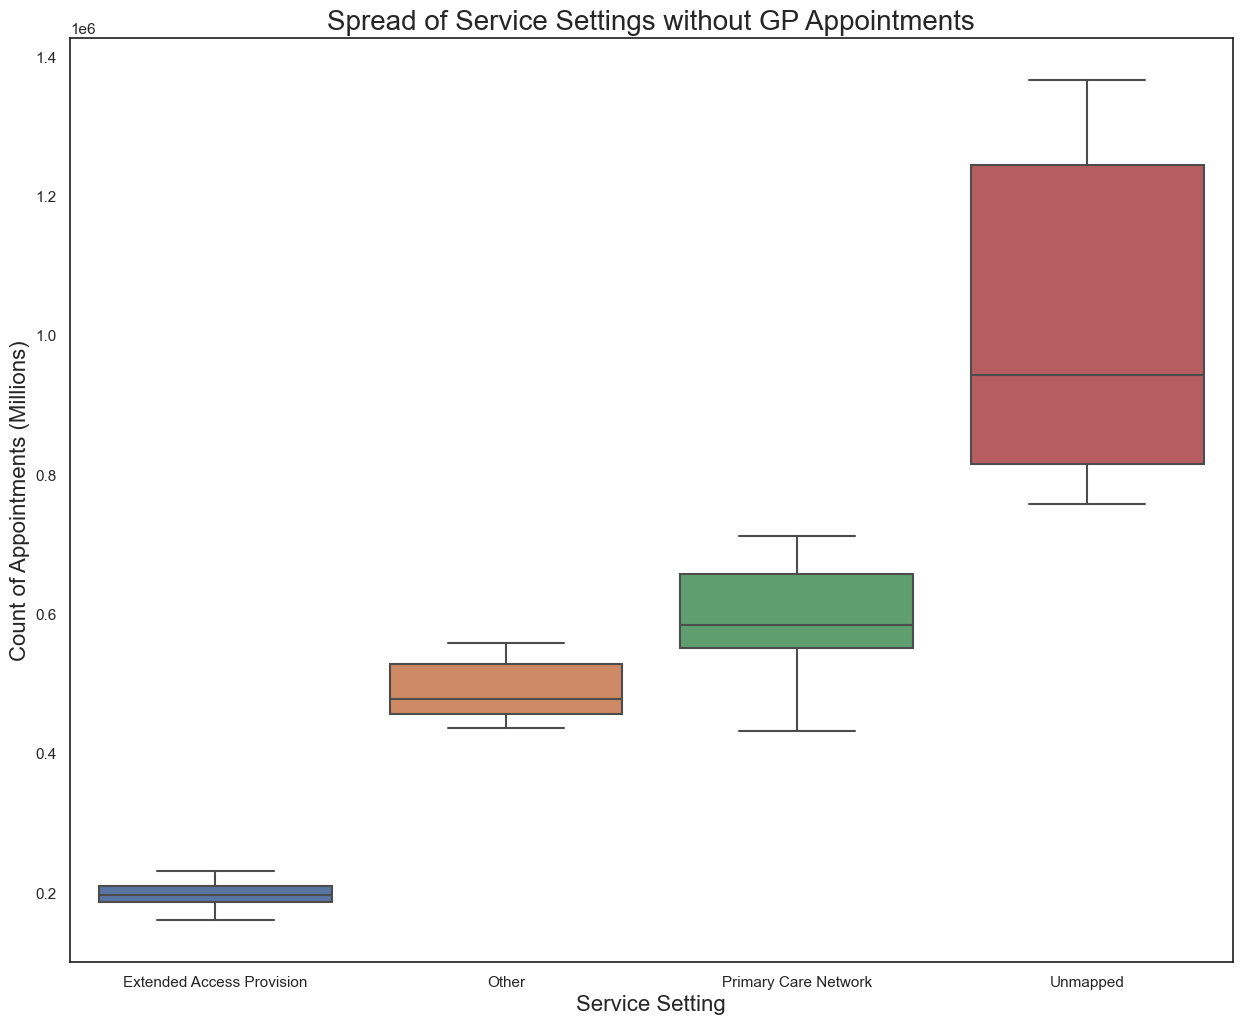

In [82]:
# Create a boxplot in Seaborn where you concentrate on all the service settings, excluding GP visits.
sns.boxplot(x='service_setting', y='count_of_appointments', 
            data=nc_ss_count[nc_ss_count.service_setting != 'General Practice'])

# Assigning legends to the title, x-axis and y-axis.
plt.title('Spread of Service Settings without GP Appointments', fontsize=20)
plt.xlabel('Service Setting', fontsize=16)
plt.ylabel('Count of Appointments (Millions)', fontsize=16)